# Action

In [1]:
import pandas as pd

## 加载数据

In [3]:
dataset = pd.read_csv('SupplyChain.csv', encoding='unicode_escape')

## 数据探索

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

In [7]:
dataset.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [9]:
dataset.shape

(180519, 53)

### 查看缺失值

In [11]:
dataset.isnull().sum()

Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0


In [12]:
dataset['Customer Zipcode'].value_counts()

725.0      66770
921.0        337
23455.0      334
957.0        297
79109.0      292
           ...  
60636.0       18
89015.0       16
32210.0       15
7728.0        13
11225.0        9
Name: Customer Zipcode, Length: 995, dtype: int64

In [13]:
###采用众数补全缺失值
dataset['Customer Zipcode'].fillna(dataset['Customer Zipcode'].mode()[0], inplace=True)

In [14]:
dataset['Customer Zipcode'].value_counts()

725.0      66773
921.0        337
23455.0      334
957.0        297
79109.0      292
           ...  
60636.0       18
89015.0       16
32210.0       15
7728.0        13
11225.0        9
Name: Customer Zipcode, Length: 995, dtype: int64

### 查看数据特征的关联性

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
data = dataset

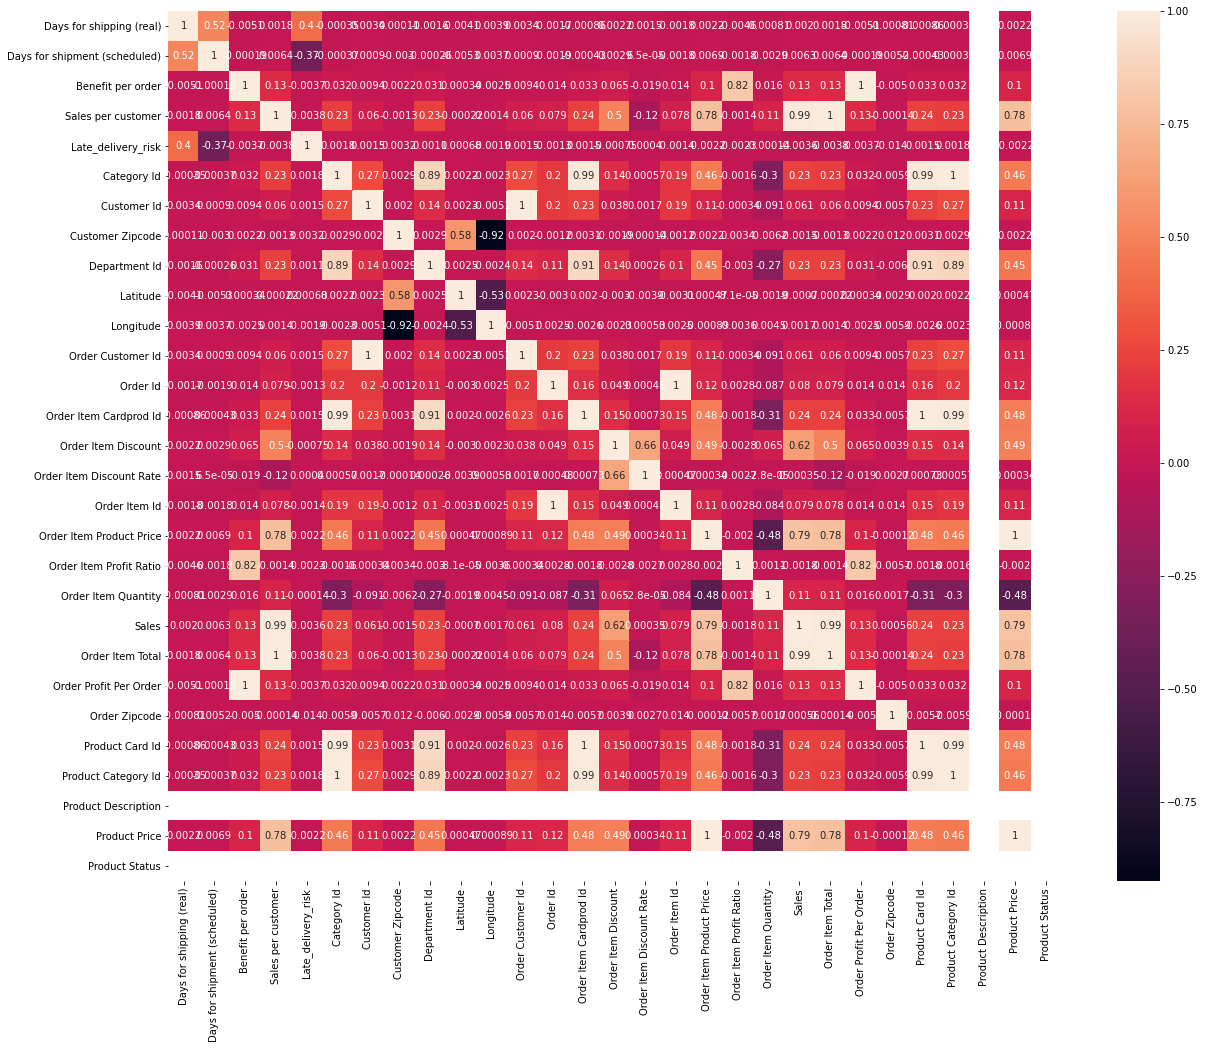

In [18]:
plt.figure(figsize=(20,16))
sns.heatmap(data.corr(),annot = True)

### 筛选不要的特征

In [20]:
data.select_dtypes(exclude='object')

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer Id,Customer Zipcode,Department Id,Latitude,...,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Price,Product Status
0,3,4,91.250000,314.640015,0,73,20755,725.0,2,18.251453,...,1,327.750000,314.640015,91.250000,NaN,1360,73,NaN,327.750000,0
1,5,4,-249.089996,311.359985,1,73,19492,725.0,2,18.279451,...,1,327.750000,311.359985,-249.089996,NaN,1360,73,NaN,327.750000,0
2,4,4,-247.779999,309.720001,0,73,19491,95125.0,2,37.292233,...,1,327.750000,309.720001,-247.779999,NaN,1360,73,NaN,327.750000,0
3,3,4,22.860001,304.809998,0,73,19490,90027.0,2,34.125946,...,1,327.750000,304.809998,22.860001,NaN,1360,73,NaN,327.750000,0
4,2,4,134.210007,298.250000,0,73,19489,725.0,2,18.253769,...,1,327.750000,298.250000,134.210007,NaN,1360,73,NaN,327.750000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,4,4,40.000000,399.980011,0,45,1005,11207.0,7,40.640930,...,1,399.980011,399.980011,40.000000,NaN,1004,45,NaN,399.980011,0
180515,3,2,-613.770019,395.980011,1,45,9141,93304.0,7,35.362545,...,1,399.980011,395.980011,-613.770019,NaN,1004,45,NaN,399.980011,0
180516,5,4,141.110001,391.980011,1,45,291,6010.0,7,41.629959,...,1,399.980011,391.980011,141.110001,NaN,1004,45,NaN,399.980011,0
180517,3,4,186.229996,387.980011,0,45,2813,725.0,7,18.213350,...,1,399.980011,387.980011,186.229996,NaN,1004,45,NaN,399.980011,0


### 按照不同的market，region

In [22]:
market = data.groupby('Market')

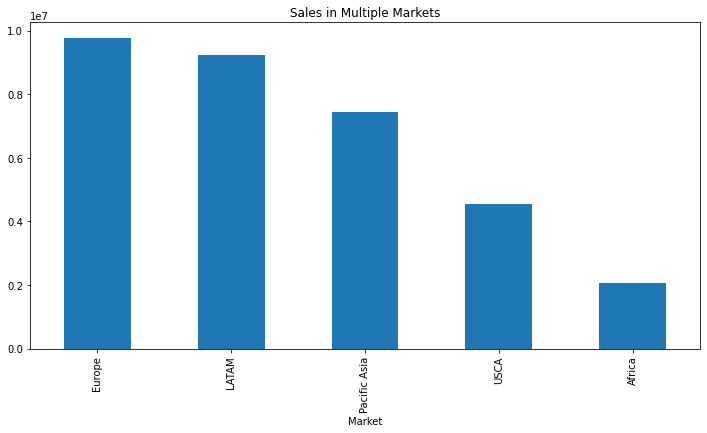

In [24]:
market['Sales per customer'].sum().sort_values(ascending =False).plot.bar(figsize=(12,6),title = 'Sales in Multiple Markets')

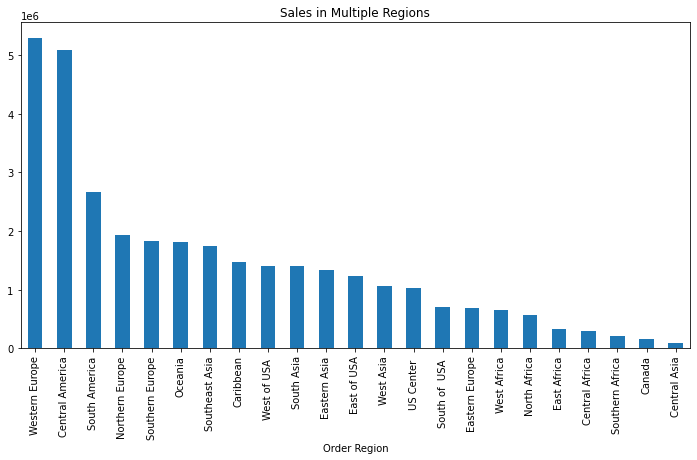

In [27]:
region = data.groupby('Order Region')
region['Sales per customer'].sum().sort_values(ascending =False).plot.bar(figsize=(12,6),title = 'Sales in Multiple Regions')

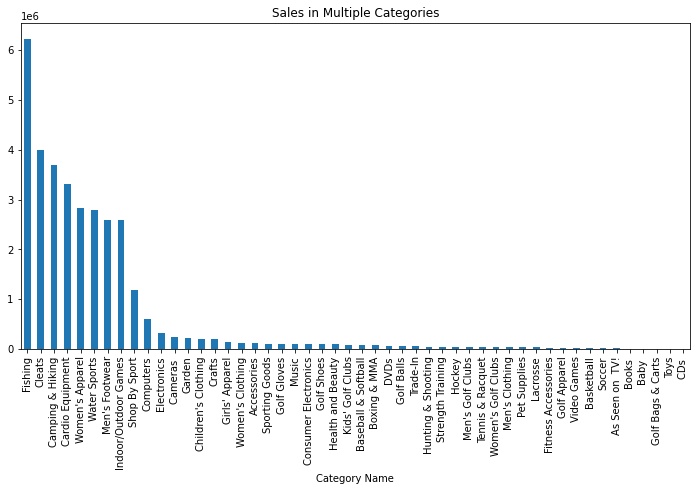

In [28]:
#按照不同的category name
category = data.groupby('Category Name')
category['Sales per customer'].sum().sort_values(ascending =False).plot.bar(figsize=(12,6),title = 'Sales in Multiple Categories')

In [ ]:
### 不同category的平均销售额

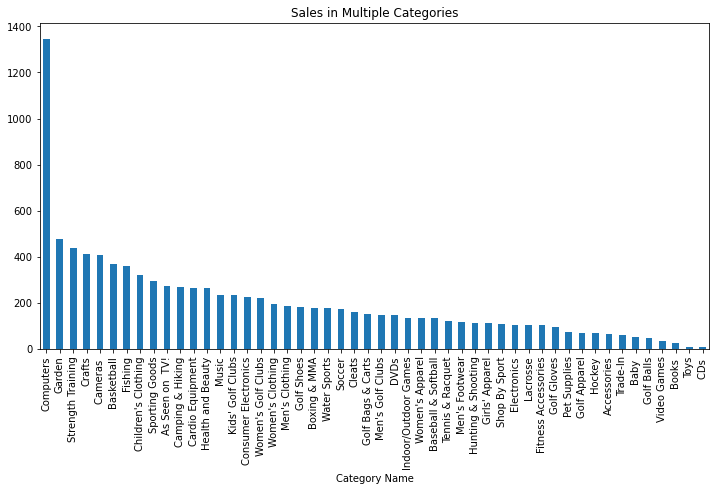

In [29]:
category['Sales per customer'].mean().sort_values(ascending =False).plot.bar(figsize=(12,6),title = 'Sales in Multiple Categories')

In [30]:
#按照不同的时间维度的趋势
temp = pd.DatetimeIndex(data['order date (DateOrders)'])
temp

DatetimeIndex(['2018-01-31 22:56:00', '2018-01-13 12:27:00',
               '2018-01-13 12:06:00', '2018-01-13 11:45:00',
               '2018-01-13 11:24:00', '2018-01-13 11:03:00',
               '2018-01-13 10:42:00', '2018-01-13 10:21:00',
               '2018-01-13 10:00:00', '2018-01-13 09:39:00',
               ...
               '2016-01-16 06:49:00', '2016-01-16 06:49:00',
               '2016-01-16 06:28:00', '2016-01-16 06:07:00',
               '2016-01-16 05:04:00', '2016-01-16 03:40:00',
               '2016-01-16 01:34:00', '2016-01-15 21:00:00',
               '2016-01-15 20:18:00', '2016-01-15 18:54:00'],
              dtype='datetime64[ns]', name='order date (DateOrders)', length=180519, freq=None)

In [31]:
# 取字段中的year，month，weekday，hour
data['year'] = temp.year
data['month'] = temp.month
data['weekday'] = temp.weekday
data['hour'] = temp.hour

In [32]:
data

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode,year,month,weekday,hour
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,2/3/2018 22:56,Standard Class,2018,1,2,22
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/18/2018 12:27,Standard Class,2018,1,5,12
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/17/2018 12:06,Standard Class,2018,1,5,12
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/16/2018 11:45,Standard Class,2018,1,5,11
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/15/2018 11:24,Standard Class,2018,1,5,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,4,4,40.000000,399.980011,Shipping on time,0,45,Fishing,Brooklyn,...,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 3:40,Standard Class,2016,1,5,3
180515,DEBIT,3,2,-613.770019,395.980011,Late delivery,1,45,Fishing,Bakersfield,...,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/19/2016 1:34,Second Class,2016,1,5,1
180516,TRANSFER,5,4,141.110001,391.980011,Late delivery,1,45,Fishing,Bristol,...,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 21:00,Standard Class,2016,1,4,21
180517,PAYMENT,3,4,186.229996,387.980011,Advance shipping,0,45,Fishing,Caguas,...,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/18/2016 20:18,Standard Class,2016,1,4,20


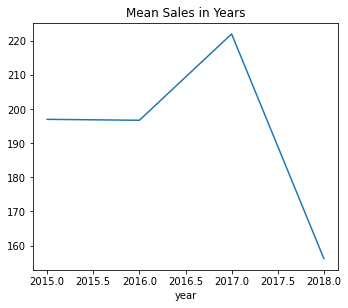

In [34]:
###按照不同的时间维度探索销售额
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
df_year = data.groupby('year')
df_year['Sales'].mean().plot(title = 'Mean Sales in Years')

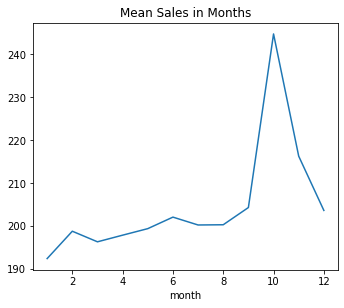

In [35]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
df_month = data.groupby('month')
df_month['Sales'].mean().plot(title = 'Mean Sales in Months')

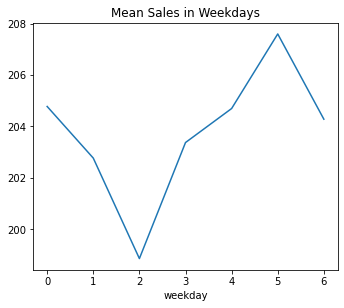

In [36]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
df_wd = data.groupby('weekday')
df_wd['Sales'].mean().plot(title = 'Mean Sales in Weekdays')

## 用户分层